In [1]:
# imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.config.threading.set_intra_op_parallelism_threads(8)
tf.config.threading.set_inter_op_parallelism_threads(2)

In [2]:
# import MNIST dataset using TF
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# prepare the data set

# normalize the images to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# flatten the imates if using a dense model (or leave as is for CNN)
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

In [4]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28*28,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# # Upgrade the model to CNN
# model = tf.keras.Sequential([
#     tf.keras.layers.Reshape((28, 28, 1), input_shape=(28*28,)),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train my model
model.fit(X_train_flat, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8756 - loss: 0.4478 - val_accuracy: 0.9663 - val_loss: 0.1264
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.9619 - loss: 0.1302 - val_accuracy: 0.9715 - val_loss: 0.0954
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9752 - loss: 0.0834 - val_accuracy: 0.9732 - val_loss: 0.0909
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9821 - loss: 0.0602 - val_accuracy: 0.9718 - val_loss: 0.0913
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0472 - val_accuracy: 0.9788 - val_loss: 0.0791
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9760 - val_loss: 0.0851
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9782 - val_loss: 0.0830
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9933 - loss: 0.023

In [6]:
# TARGET image

# Absolute path as a raw string (to avoid backslash issues on Windows)
image_path = r"C:/Users/Gebruiker/Documents/digits/handwritten_1_2.png"
# Step 1: Read image file
raw = tf.io.read_file(image_path)
# Step 2: Decode as grayscale image
img = tf.image.decode_image(raw, channels=1)
# Step 3: Resize to 28×28 (MNIST size)
img_resized = tf.image.resize(img, [28, 28])
# Step 4: Normalize to [0, 1]
img_normalized = tf.image.convert_image_dtype(img_resized, tf.float32)
# Final variable
target_image = img_normalized.numpy()

In [7]:
# Predict and interpret a target image
# Normalize and flatten the image
target_flat = target_image.reshape(1, 28*28) / 255.0
# Get probabilities
probs = model.predict(target_flat)[0]
# Show probabilities and prediction
for digit, prob in enumerate(probs):
    print(f"Probability of {digit}: {prob:.2%}")
predicted_digit = np.argmax(probs)
print(f"\nPredicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probability of 0: 0.00%
Probability of 1: 0.00%
Probability of 2: 0.00%
Probability of 3: 0.00%
Probability of 4: 0.00%
Probability of 5: 100.00%
Probability of 6: 0.00%
Probability of 7: 0.00%
Probability of 8: 0.00%
Probability of 9: 0.00%

Predicted Digit: 5


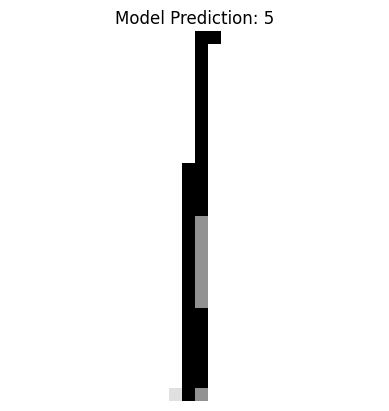

In [8]:
# Visualise the target image
plt.imshow(target_image, cmap='gray')
plt.title(f"Model Prediction: {predicted_digit}")
plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


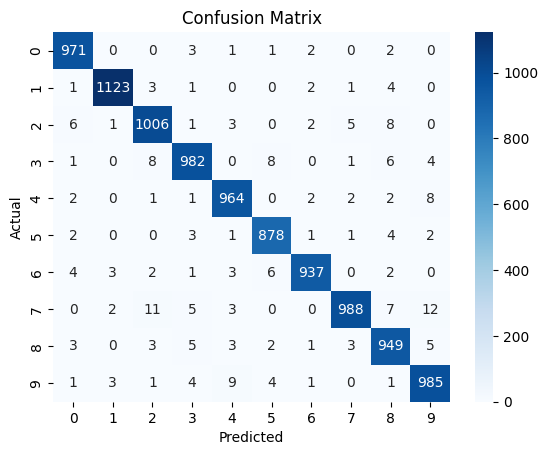

In [9]:
# adding a confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test_flat), axis=1)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Questions:

1. why flatten images if using a dense model and leave it as is for CNN?
2. explain the normalizing X_train / 255.0
3. how to store an image in python into a variable called target_image
```
# Absolute path as a raw string (to avoid backslash issues on Windows)
image_path = r"/Users/owen/Documents/digits/handwritten_1.png"
# Step 1: Read image file
raw = tf.io.read_file(image_path)
# Step 2: Decode as grayscale image
img = tf.image.decode_image(raw, channels=1)
# Step 3: Resize to 28×28 (MNIST size)
img_resized = tf.image.resize(img, [28, 28])
# Step 4: Normalize to [0, 1]
img_normalized = tf.image.convert_image_dtype(img_resized, tf.float32)
# Final variable
target_image = img_normalized.numpy()
```